### Tutorial on Lasso Regression Method
Mini-lecture given on April 23, 2024 for CS315\
Authors: Caroline Jung, Tayae Rogers\
References: [https://machinelearningmastery.com/lasso-regression-with-python/](https://machinelearningmastery.com/lasso-regression-with-python/)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_13592/3164397486.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read in dataset
data = pd.read_csv("tiktok_metadata.csv")
data.columns

Index(['video_id', 'video_timestamp', 'video_duration',
       'video_locationcreated', 'suggested_words', 'video_diggcount',
       'video_sharecount', 'video_commentcount', 'video_playcount',
       'video_description', 'video_is_ad', 'video_stickers', 'author_username',
       'author_name', 'author_followercount', 'author_followingcount',
       'author_heartcount', 'author_videocount', 'author_diggcount',
       'author_verified'],
      dtype='object')

We are interested in the following columns:
* features: video_duration, video_sharecount, video_commentcount, video_is_ad, author_verified
* label: video_playcount

In [4]:
import numpy as np
columns = ["video_playcount", "video_duration", "video_sharecount", "video_commentcount", "video_is_ad", "author_verified"]

data_clean = data.loc[:, columns]
data_clean.replace({False: 0, True: 1}, inplace=True)
print("Dimensions: ", data_clean.shape)
data_clean.dropna(axis=0, inplace=True)
print("Dimensions after dropping NAs: ", data_clean.shape)

data_clean

Dimensions:  (7663, 6)
Dimensions after dropping NAs:  (7652, 6)


/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_13592/2419427330.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean.replace({False: 0, True: 1}, inplace=True)


,video_playcount,video_duration,video_sharecount,video_commentcount,video_is_ad,author_verified
0,19000000.0,18.0,40100.0,11000.0,0,0
1,6589.0,8.0,1.0,2.0,0,0
2,42400.0,6.0,3.0,8.0,0,0
3,6589.0,8.0,1.0,2.0,0,0
4,42400.0,6.0,3.0,8.0,0,0
...,...,...,...,...,...,...
7658,1800000.0,77.0,18700.0,8859.0,0,0
7659,338900000.0,17.0,3921.0,0.0,1,0
7660,19600.0,13.0,6.0,21.0,0,0
7661,14600000.0,61.0,13700.0,6615.0,0,0


Now we have our cleaned dataset with specific columns of interest and no NA values (for the sake of simplicity and due to large number of rows, we chose to drop the entire row if one of our columns of interest had at least one missing value). Now, let's split them into training and test data sets with a 70-30 split:

In [5]:
# split into train and test data
train, test = train_test_split(data_clean, test_size=0.3)

x_train, y_train = train.iloc[:,1:], train.iloc[:,[1]]
x_test, y_test = test.iloc[:,1:], test.iloc[:,[1]]

In [9]:
lassoreg = Lasso(alpha=0.3)
lassoreg.fit(x_train, y_train)

# regression coefficients
coefs = pd.DataFrame(index=columns[1:], data=lassoreg.coef_)
coefs.loc["intercept"] = lassoreg.intercept_[0]
print(coefs)

                               0
video_duration      9.998743e-01
video_sharecount    5.889714e-09
video_commentcount  1.671872e-08
video_is_ad        -0.000000e+00
author_verified     0.000000e+00
intercept           3.856554e-03


Note that two of our features of interest have coefficients of 0: video_is_ad and author_verified. Our lasso regression has reduced the dimensionality of our model to only 3 features (video_duration, video_sharecount, video_commentcount) and calculated coefficient estimates

In [7]:
import matplotlib.pyplot as plt
y_pred = lassoreg.predict(x_test)

y_test["predicted_val"] = y_pred
y_test["diff"] = y_test["video_duration"]-y_pred
y_test.rename(columns={"video_duration": "actual_val"})

/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_13592/2859609748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["predicted_val"] = y_pred
/var/folders/cw/4tmbrj3d1pzd4rhyrm8vnwyc0000gn/T/ipykernel_13592/2859609748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["diff"] = y_test["video_duration"]-y_pred


,actual_val,predicted_val,diff
4409,15.0,15.001975,-0.001975
5454,7.0,7.002996,-0.002996
5397,13.0,13.002268,-0.002268
1629,0.0,0.003872,-0.003872
3873,0.0,0.003914,-0.003914
...,...,...,...
2916,8.0,8.002851,-0.002851
1420,0.0,0.003869,-0.003869
7480,40.0,39.998831,0.001169
4650,20.0,20.002766,-0.002766


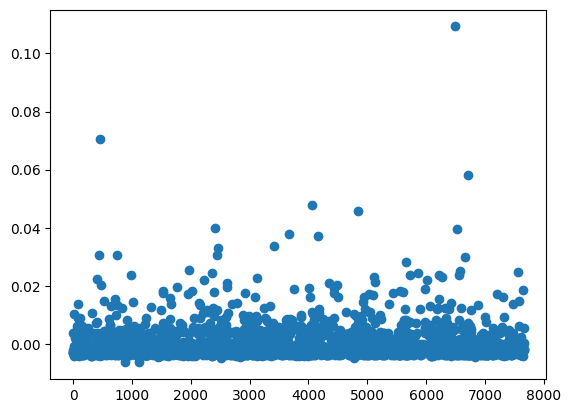

In [8]:
plt.scatter(y_test.index, y_test["diff"]) # Our predictions are pretty good on the training set
plt.show()

#### Tuning the Hyperparameter

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [11]:
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [12]:
grid = dict()
grid['alpha'] = np.arange(0.01,1,0.01)

In [ ]:
# Try it with train/test split
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error',
                      cv=cv, refit=True, n_jobs=-1)
results = search.fit(x_train, y_train)

In [ ]:
search.predict(x_test)

array([2.10000438e+01, 1.26905390e-04, 1.50000659e+01, ...,
       1.27739548e-04, 2.20000376e+01, 1.10000824e+01])

In [ ]:
y_pred2 = search.predict(x_test)

y_test["predicted_val2"] = y_pred2
y_test["diff2"] = y_test["video_duration"]-y_pred2
y_test.rename(columns={"video_duration": "actual_val"})

<ipython-input-44-d00469ae834a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["predicted_val2"] = y_pred2
<ipython-input-44-d00469ae834a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["diff2"] = y_test["video_duration"]-y_pred2


,actual_val,predicted_val,diff,predicted_val2,diff2
4010,21.0,21.004379,-0.004379,21.000044,-0.000044
976,0.0,0.012691,-0.012691,0.000127,-0.000127
4830,15.0,15.006587,-0.006587,15.000066,-0.000066
7364,62.0,61.987484,0.012516,61.999875,0.000125
6624,14.0,14.006984,-0.006984,14.000070,-0.000070
...,...,...,...,...,...
7272,12.0,12.007931,-0.007931,12.000079,-0.000079
7641,363.0,362.865145,0.134855,362.998651,0.001349
1246,0.0,0.012774,-0.012774,0.000128,-0.000128
4723,22.0,22.003759,-0.003759,22.000038,-0.000038


In [ ]:
y_test['diff2'].describe()

count    2296.000000
mean       -0.000007
std         0.000191
min        -0.000251
25%        -0.000097
50%        -0.000067
75%         0.000019
max         0.003534
Name: diff2, dtype: float64

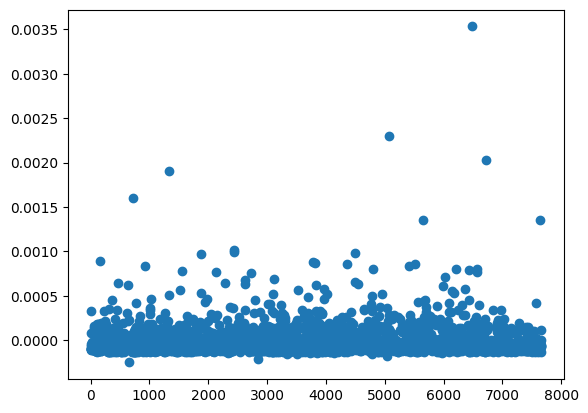

In [ ]:
plt.scatter(y_test.index, y_test["diff2"]) # Our predictions are pretty good on the training set
plt.show()

In [ ]:
search.best_estimator_
#search.best_score_
#search.best_params_

Lasso(alpha=0.01)